# importing the libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Loading the Dataset

In [3]:
df = pd.read_excel(r"C:\Users\praha\Downloads\Sample_-_Superstore.xls")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.drop("Row ID",axis=1,inplace = True)

In [8]:
df.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [13]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# Structural Errors

In [18]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [24]:
numerical = df.select_dtypes(include=["int","float"])
categorical =  df.select_dtypes(include="object")


Checking the Unique value counts

In [26]:
for i in categorical:
    print("*"*10,i,"*"*10)
    print(categorical[i].agg(['count','nunique','unique']))
    print('Value Counts: \n',categorical[i].value_counts())
    print(0)

********** Order ID **********
count                                                   9993
nunique                                                 5009
unique     [CA-2016-152156, CA-2016-138688, US-2015-10896...
Name: Order ID, dtype: object
Value Counts: 
 CA-2017-100111    14
CA-2017-157987    12
US-2016-108504    11
CA-2016-165330    11
CA-2016-105732    10
                  ..
CA-2016-157259     1
CA-2017-107986     1
US-2015-112508     1
US-2016-126844     1
CA-2017-119914     1
Name: Order ID, Length: 5009, dtype: int64
0
********** Ship Mode **********
count                                                   9993
nunique                                                    4
unique     [Second Class, Standard Class, First Class, Sa...
Name: Ship Mode, dtype: object
Value Counts: 
 Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
0
********** Customer ID **********
count                                       

# Checking the statical Measures

In [30]:
for i in numerical:
    print("*"*10,i,"*"*10)
    print(numerical[i].agg(['min','max','mean','median','std']))
    print(0)
    

********** Postal Code **********
min        1040.000000
max       99301.000000
mean      55191.576403
median    56560.000000
std       32065.074478
Name: Postal Code, dtype: float64
0
********** Sales **********
min           0.444000
max       22638.480000
mean        229.852846
median       54.480000
std         623.276074
Name: Sales, dtype: float64
0
********** Quantity **********
min        1.000000
max       14.000000
mean       3.789753
median     3.000000
std        2.225149
Name: Quantity, dtype: float64
0
********** Discount **********
min       0.000000
max       0.800000
mean      0.156188
median    0.200000
std       0.206457
Name: Discount, dtype: float64
0
********** Profit **********
min      -6599.978000
max       8399.976000
mean        28.660971
median       8.671000
std        234.271476
Name: Profit, dtype: float64
0


# Duplicated values

In [31]:
df[df.duplicated()]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [33]:
df=df.drop_duplicates()

In [35]:
df.duplicated().sum()

0

# Dropping unwanted columns

In [37]:
df.drop(['Order ID','Postal Code'],axis = 1, inplace = True)

# Outliers

Statistical Method

In [38]:
D = df.select_dtypes(exclude=["object",'datetime64[ns]'])

In [47]:
for i in D.columns:
        q1 = D[i].quantile(0.75)
        q3 = D[i].quantile(0.75)
        IQR = q3-q1
        lower = q1 -(1.5 *IQR)
        upper = q3 +(1.5 * IQR)
        print(f"{i} lower limit is {lower}")
        print(f"{i} upper limit is {upper}")
    

Sales lower limit is 209.94
Sales upper limit is 209.94
Quantity lower limit is 5.0
Quantity upper limit is 5.0
Discount lower limit is 0.2
Discount upper limit is 0.2
Profit lower limit is 29.363999999999997
Profit upper limit is 29.363999999999997


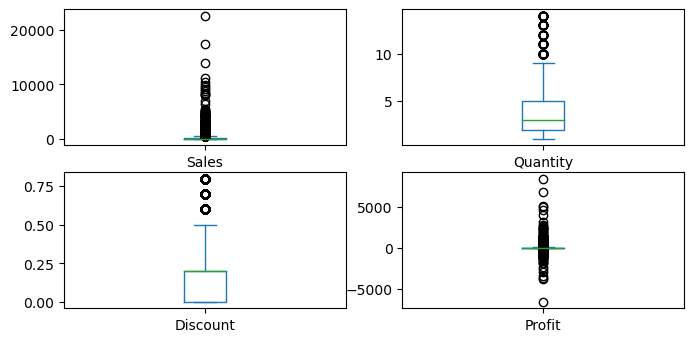

In [51]:
df.plot(kind = 'box',subplots = True,layout = (3,2),figsize =(8,6))
plt.show()

# Univariate Analysis

Numerical - Hist,Box,Density

In [53]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [56]:
plt.style.use('classic')

# Histogram

It is used to find the distibution

<Axes: ylabel='Frequency'>

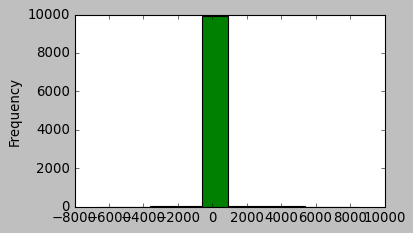

In [58]:
df['Profit'].plot(kind= 'hist',figsize = (5,3),color = 'green')

<Axes: ylabel='Frequency'>

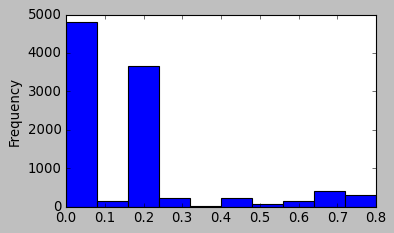

In [59]:
df['Discount'].plot(kind='hist',figsize = (5,3))

<Axes: ylabel='Frequency'>

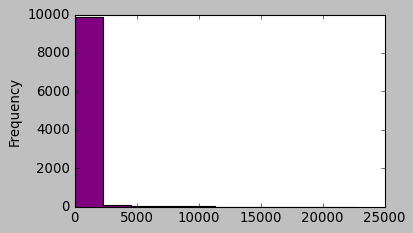

In [62]:
df['Sales'].plot(kind = 'hist',figsize = (5,3),color = 'purple')

<Axes: ylabel='Frequency'>

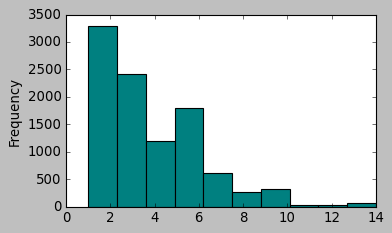

In [64]:
df['Quantity'].plot(kind='hist',figsize = (5,3),color = 'teal')

# Box plot

to find the outliers

<Axes: >

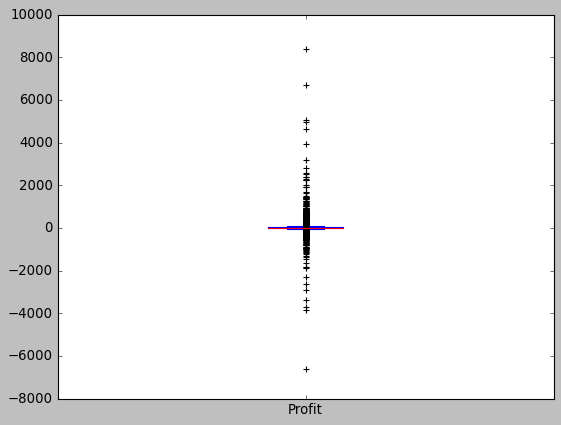

In [66]:
df['Profit'].plot(kind = 'box')

<Axes: >

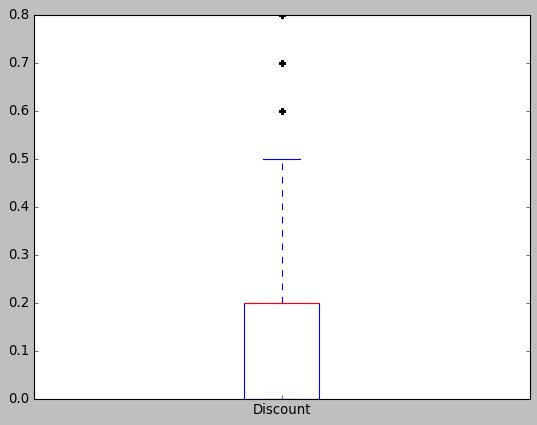

In [67]:
df['Discount'].plot(kind = 'box')

<Axes: >

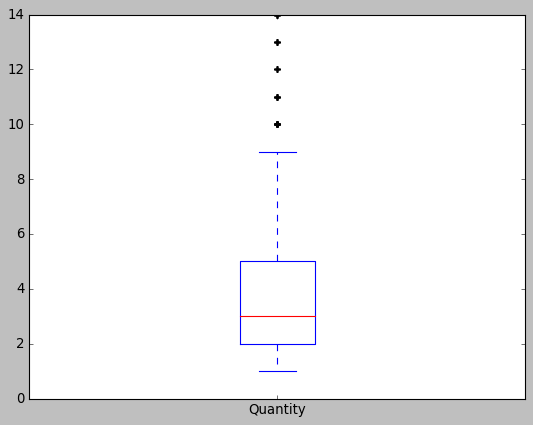

In [68]:
df['Quantity'].plot(kind='box')

# Density Plot

<Axes: ylabel='Density'>

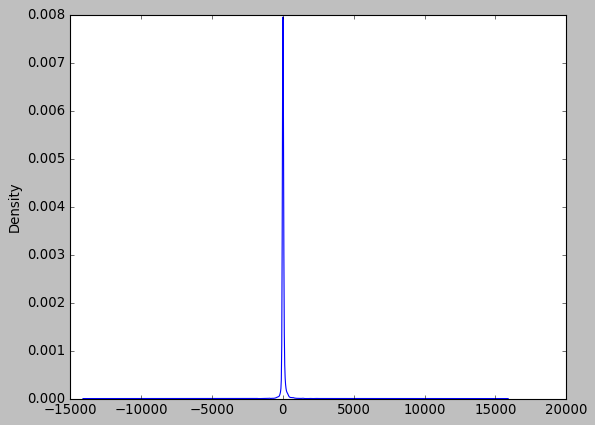

In [70]:
df['Profit'].plot(kind = 'kde')

<Axes: ylabel='Density'>

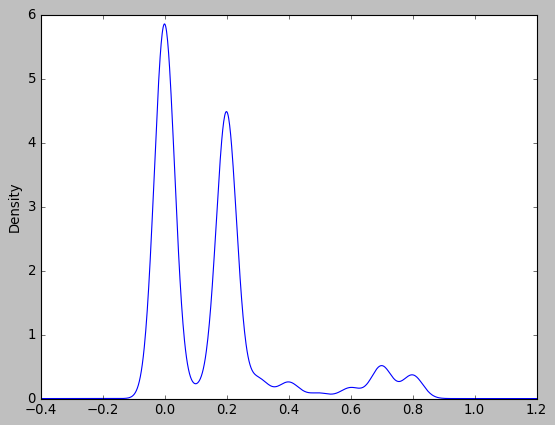

In [71]:
df['Discount'].plot(kind = 'kde')

<Axes: ylabel='Density'>

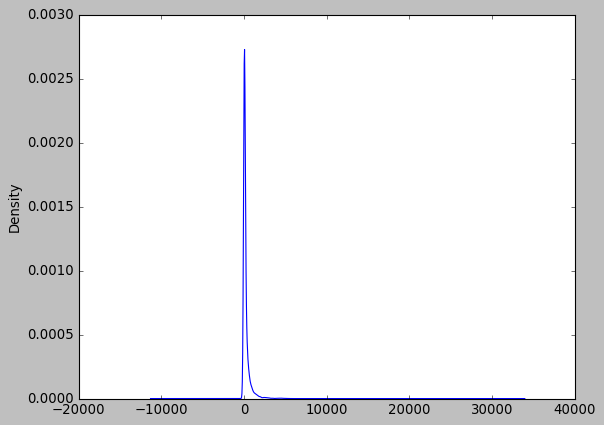

In [72]:
df['Sales'].plot(kind= 'kde')

<Axes: ylabel='Density'>

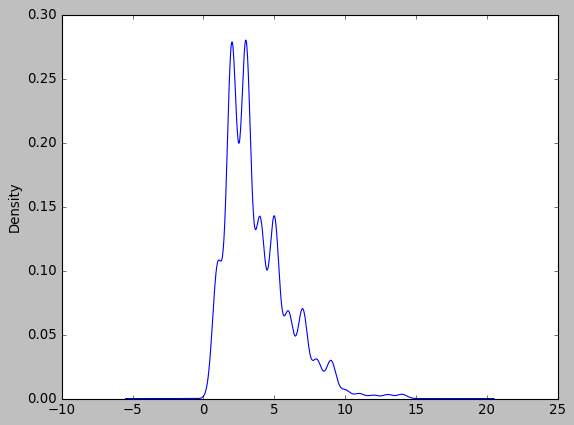

In [73]:
df['Quantity'].plot(kind= 'kde')

# Summary

* It is not distributed normally.

* There are outliers in the dataset

* No density plot is bell shaped


# Categorical

count, bar, pie

# Seaborn

<Axes: xlabel='Category', ylabel='count'>

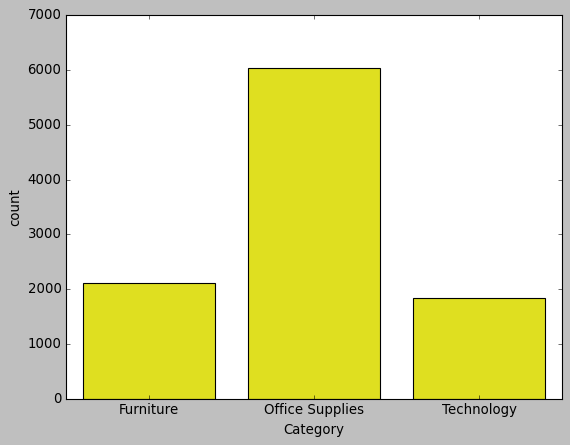

In [75]:
sns.countplot(data = df,x ='Category', color='yellow',orient ='h')

<Axes: xlabel='Ship Mode', ylabel='count'>

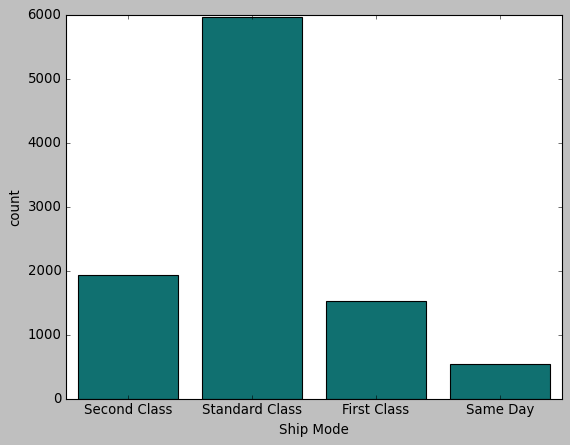

In [76]:
sns.countplot(data = df,x = 'Ship Mode', color = 'teal',orient= 'h')

# Bar

<Axes: title={'center': 'Products Category'}>

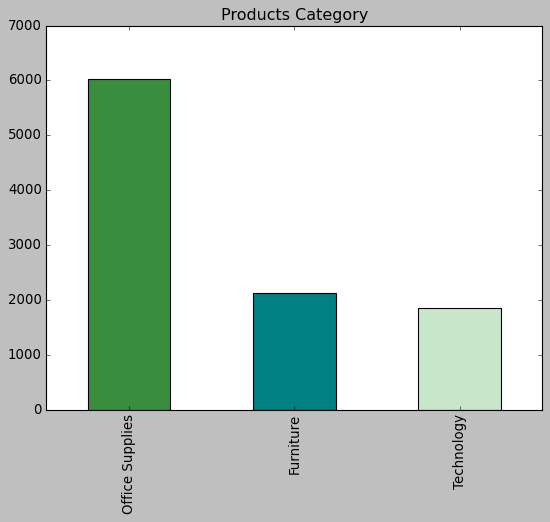

In [79]:
df['Category'].value_counts().plot(kind= 'bar',title = "Products Category",color = ['#388E3c','teal','#C8E6c9'],
                                  )

<Axes: >

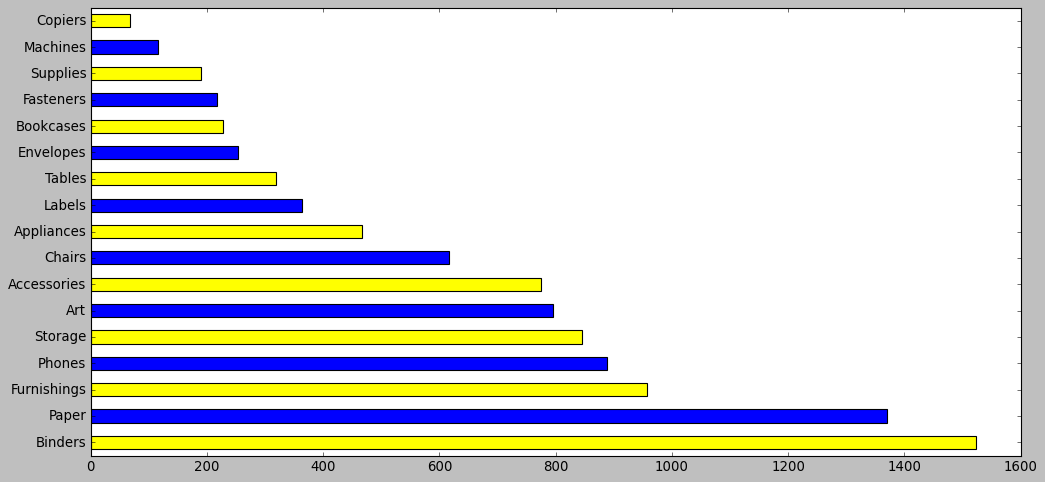

In [81]:
df['Sub-Category'].value_counts().plot(kind='barh', color =['yellow', 'blue'], figsize = (15,7))

<Axes: >

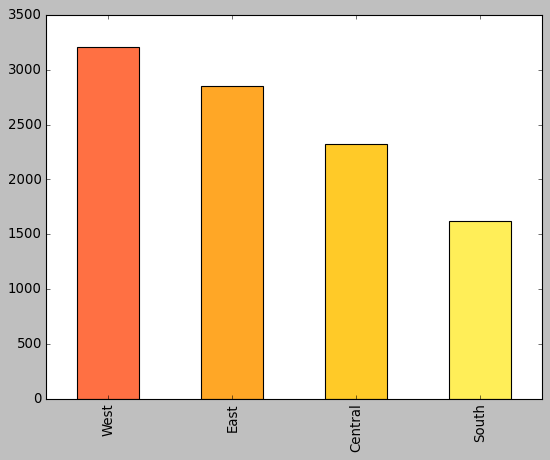

In [82]:
df['Region'].value_counts().plot(kind = 'bar', color =['#FF7043','#FFA726','#FFCA28','#FFEE58'])

<Axes: >

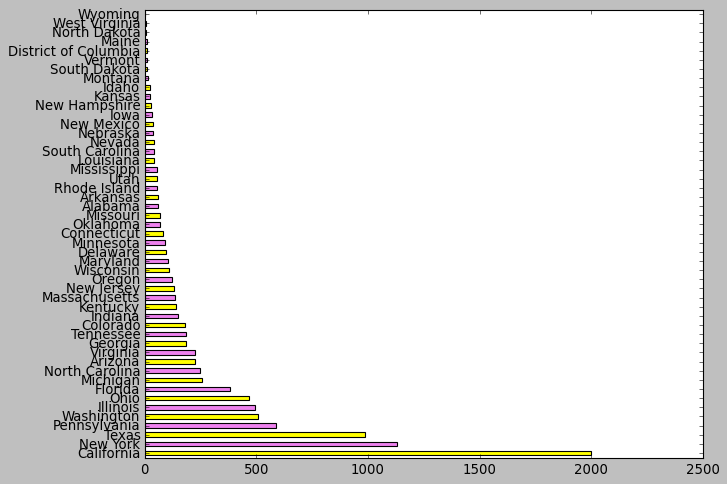

In [86]:
df['State'].value_counts().plot(kind = 'barh' ,figsize = (9,7),color = ['yellow','violet'])

# Pie Chart

<Axes: ylabel='Sub-Category'>

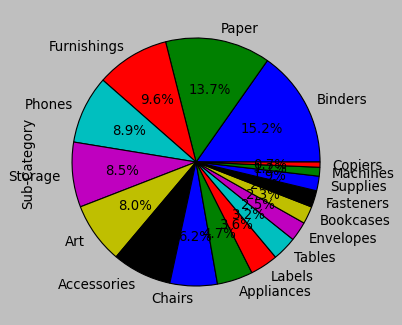

In [88]:
df['Sub-Category'].value_counts().plot(kind = 'pie',autopct = '%1.1f%%', figsize = (5,5))

<Axes: ylabel='Ship Mode'>

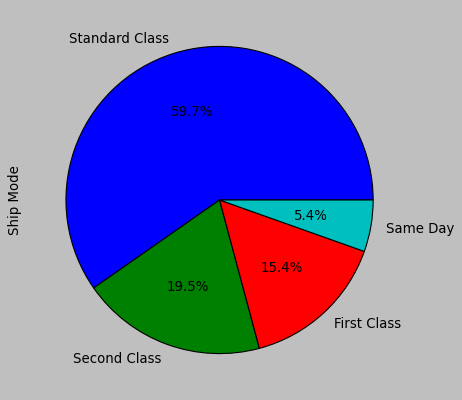

In [89]:
df['Ship Mode'].value_counts().plot(kind = 'pie', autopct ='%1.1f%%',)

# Categorical and Categorical

crosstab, count plot , stacked

In [90]:
pd.crosstab(df['Country'], df['State'])

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Country,,,,,,,,,,,,,,,,,,,,,
United States,61,224,60,2001,182,82,96,10,383,184,...,12,183,985,53,11,224,506,4,110,1


In [92]:
pd.crosstab(df['State'],df['Region'])

Region,Central,East,South,West
State,,,,
Alabama,0,0,61,0
Arizona,0,0,0,224
Arkansas,0,0,60,0
California,0,0,0,2001
Colorado,0,0,0,182
Connecticut,0,82,0,0
Delaware,0,96,0,0
District of Columbia,0,10,0,0
Florida,0,0,383,0


In [93]:
pd.crosstab(df['Segment'],df['City'])

City,Aberdeen,Abilene,Akron,Albuquerque,Alexandria,Allen,Allentown,Altoona,Amarillo,Anaheim,...,Wilmington,Wilson,Woodbury,Woodland,Woodstock,Woonsocket,Yonkers,York,Yucaipa,Yuma
Segment,,,,,,,,,,,,,,,,,,,,,
Consumer,1,1,13,4,3,4,2,0,8,16,...,24,2,0,1,3,1,13,0,0,0
Corporate,0,0,6,4,6,0,0,2,2,11,...,9,3,3,2,1,3,0,5,1,2
Home Office,0,0,2,6,7,0,5,0,0,0,...,3,1,0,0,1,0,2,0,0,2


<Axes: xlabel='Category', ylabel='count'>

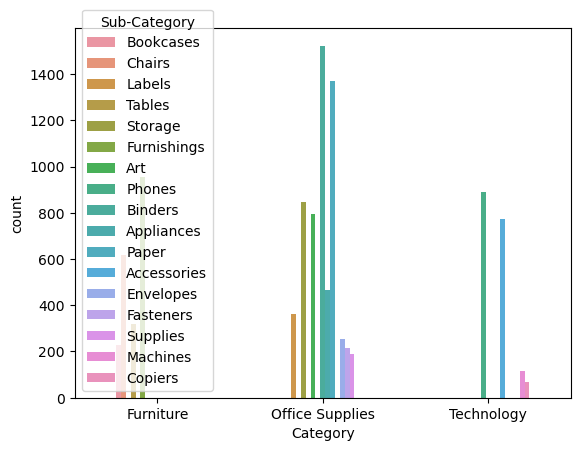

In [14]:
sns.countplot(data = df, x = 'Category', hue = 'Sub-Category', width = 0.5)

<Axes: xlabel='Country', ylabel='count'>

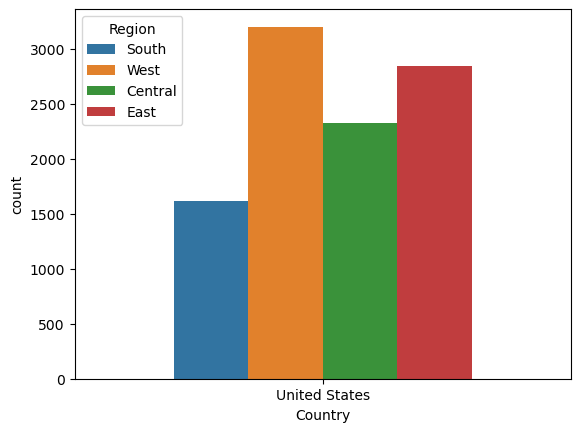

In [19]:
sns.countplot(data = df, x= 'Country', hue = 'Region', width =0.6)

<Axes: xlabel='State', ylabel='count'>

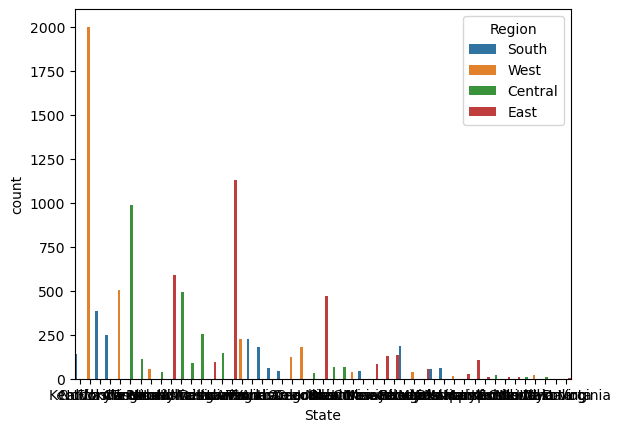

In [20]:
sns.countplot(data = df, x = 'State', hue = 'Region', width =1)

# Categorica & Numerical

Group By , Pivot , line chart

In [21]:
df.groupby(by = "State")['Sales'].mean()

State
Alabama                  319.846557
Arizona                  157.508933
Arkansas                 194.635500
California               228.729451
Colorado                 176.418231
Connecticut              163.223866
Delaware                 285.948635
District of Columbia     286.502000
Florida                  233.612815
Georgia                  266.825217
Idaho                    208.689810
Illinois                 162.939230
Indiana                  359.431946
Iowa                     152.658667
Kansas                   121.429583
Kentucky                 263.250000
Louisiana                219.453095
Maine                    158.816250
Maryland                 225.766886
Massachusetts            212.106919
Michigan                 299.096525
Minnesota                335.541011
Mississippi              203.232830
Missouri                 336.441667
Montana                  372.623467
Nebraska                 196.445526
Nevada                   428.951333
New Hampshire         

In [22]:
df.groupby(by = "Country")['Sales'].mean()

Country
United States    229.858001
Name: Sales, dtype: float64

In [23]:
df.groupby(by = "Region")['Sales'].mean()

Region
Central    215.772661
East       238.336110
South      241.803645
West       226.493233
Name: Sales, dtype: float64

In [25]:
df.groupby(by = "Category")['Sales'].max()

Category
Furniture           4416.174
Office Supplies     9892.740
Technology         22638.480
Name: Sales, dtype: float64

# Line Chart

<Axes: >

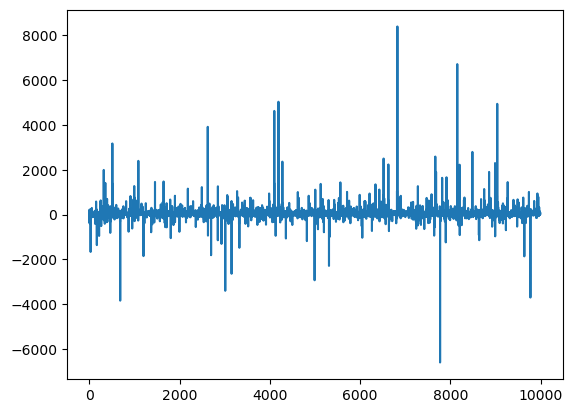

In [26]:
df['Profit'].plot(kind = 'line')

<Axes: >

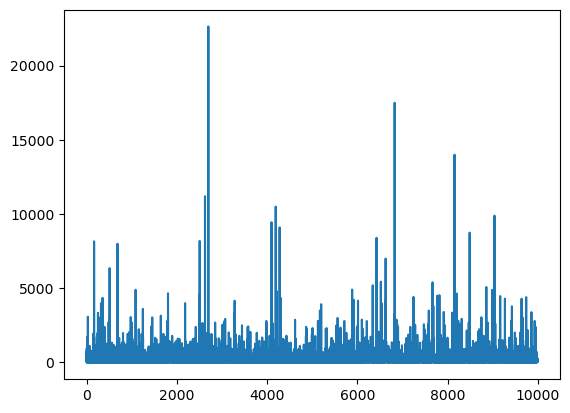

In [27]:
df['Sales'].plot(kind = 'line')

# Multivariate Analysis

Scatter Plot : to find the relationship/correlation between 2 numerical columns

In [28]:
df.corr(numeric_only = True)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


<Axes: >

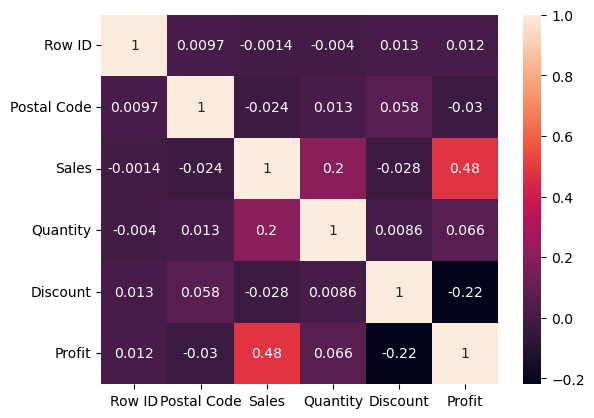

In [29]:
sns.heatmap(df.corr(numeric_only=True), annot = True)

* Correaltion ranges from -0.2 to +1

* -0.2 to 0.5 indicates negative correlation

* +0.5 to 0.1 indicates positive correlation